In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

%matplotlib inline

In [6]:
data = pd.read_csv('Advertising.csv', index_col = 0)
data.head()
data.columns = ['TV', 'Radio', 'Newspaper', 'Sales']

In [7]:
data.shape

(200, 4)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

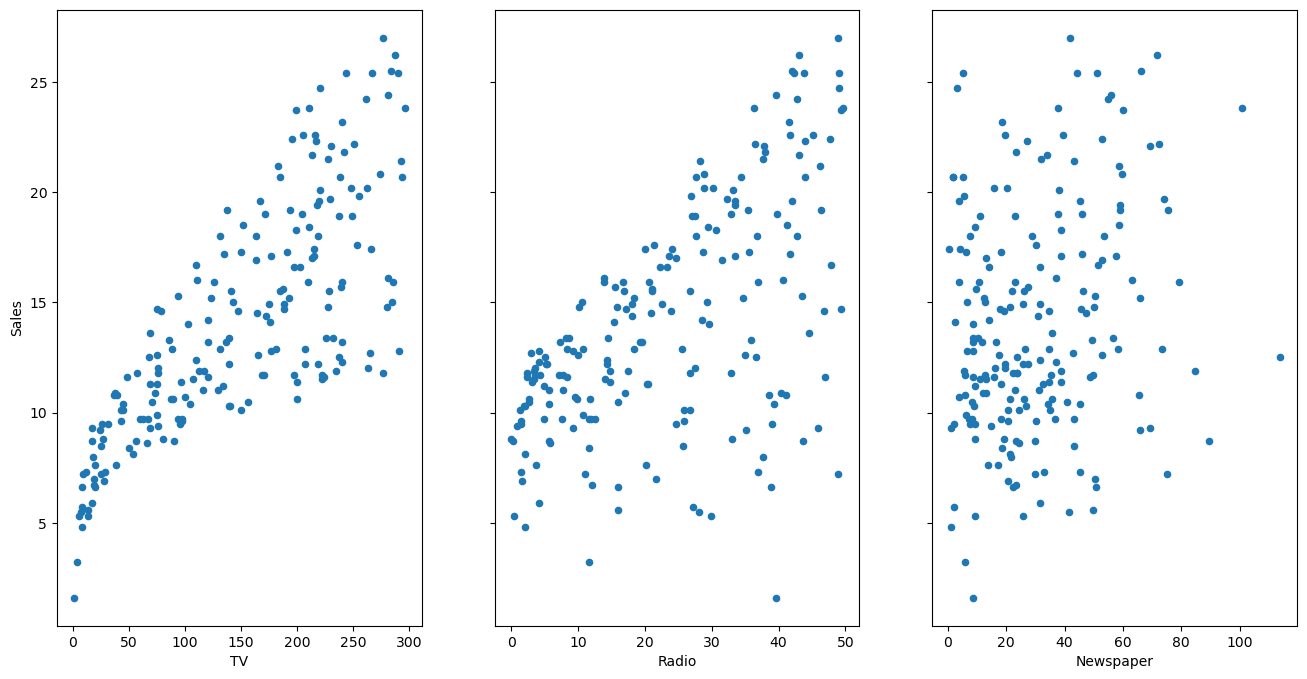

In [10]:
fig, axs = plt.subplots(1, 3, sharey = True)
data.plot(kind = 'scatter', x = 'TV', y = 'Sales', ax = axs[0], figsize = (16, 8))
data.plot(kind = 'scatter', x = 'Radio', y = 'Sales', ax = axs[1])
data.plot(kind = 'scatter', x = 'Newspaper', y = 'Sales', ax = axs[2])

In [13]:
feature_cols = ['TV']
x = data[feature_cols]
y = data.Sales

In [16]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x, y) #WHY IS THIS BREAKING.. video gives output of 'copy_X = True, fit_intercept = True, etc.'

LinearRegression()

In [17]:
print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


In [18]:
#using this linear equation for future prediction
7.032593549127693 + 0.04753664 * 50

9.409425549127693

In [19]:
x_new = pd.DataFrame({'TV':[50]})
x_new.head()

,TV
0,50


In [20]:
lm.predict(x_new)

array([9.40942557])

In [21]:
x_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
x_new.head()

,TV
0,0.7
1,296.4


In [22]:
preds = lm.predict(x_new)
preds

array([ 7.0658692 , 21.12245377])

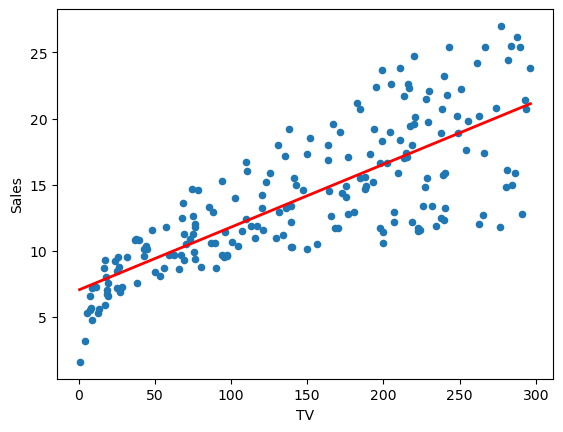

In [23]:
data.plot(kind = 'scatter', x = 'TV', y = 'Sales')
plt.plot(x_new, preds, c = 'red', linewidth = 2)

In [24]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'Sales ~ TV', data = data).fit()

In [25]:
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [26]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [27]:
lm.rsquared

0.611875050850071

In [28]:
feature_cols = ['TV', 'Radio', 'Newspaper'] # moldable lin reg
x = data[feature_cols]
y = data.Sales

from sklearn import model_selection
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(x, y, test_size = .3, random_state = 42)

In [29]:
lm = LinearRegression()
lm.fit(x, y)
print(lm.intercept_)
print(lm.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [30]:
lm = LinearRegression()
lm.fit(xtrain, ytrain) #this breaks again lol -> this was the only thing I wanted to work -> the Linear Regression module
#oh fuck me is it because i didn't pip install it into my FRIGGIN conda packages, I'm sure that's what happened

LinearRegression()

In [31]:
print(lm.intercept_)
print(lm.coef_)

predictions = lm.predict(xtest)
print(sqrt(mean_squared_error(ytest, predictions)))

2.708949092515912
[0.04405928 0.1992875  0.00688245]
1.9485372043446383


In [32]:
lm = smf.ols(formula = 'Sales~TV + Radio + Newspaper', data = data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           1.58e-96
Time:                        18:51:07   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
#nonrobus covariance type can be addressed, but usually you are looking at covariance on a measure close to 0
#-.5 or .5 would be normal, 1 or -1 would be unnaturally skewed datasets
#https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.get_robustcov_results.html

In [36]:
#we're apparently supposed to be looking at pvalues to reject null hypothesis

In [37]:
#it can be obvious from the coefficient and negative tvalue that newspapers are suffering in sales from ads

In [38]:
#Try different models from here

In [39]:
lm = smf.ols(formula = 'Sales ~ TV + Radio', data = data).fit()
lm.rsquared

0.8971942610828957

In [40]:
lm = smf.ols(formula = 'Sales ~ TV + Radio + Newspaper' ,data = data).fit()
lm.rsquared

0.8972106381789522

In [41]:
import numpy as np
np.random.seed(12345)

nums = np.random.rand(len(data))
mask_large = nums > .5

data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


In [46]:
data['IsLarge'] = data.Size.map({'small': 0, 'large': 1})
data.head()

,TV,Radio,Newspaper,Sales,Size,Islarge,IsLarge
1,230.1,37.8,69.2,22.1,large,1,1
2,44.5,39.3,45.1,10.4,small,0,0
3,17.2,45.9,69.3,9.3,small,0,0
4,151.5,41.3,58.5,18.5,small,0,0
5,180.8,10.8,58.4,12.9,large,1,1


In [53]:
feature_cols = ['TV', 'Radio', 'Newspaper', 'IsLarge']
x = data[feature_cols]
y = data.Sales

lm = LinearRegression()
lm.fit(x, y)

zip(feature_cols, ) #lm.coef) #< - this breaks, "no coef module" Error

In [55]:
np.random.seed(123456)

nums = np.random.rand(len(data))
mask_suburban = (nums > .33) & (nums < .66) #cuts market into thirds for the suburbs
mask_urban = nums > .66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,Radio,Newspaper,Sales,Size,Islarge,IsLarge,Area
1,230.1,37.8,69.2,22.1,large,1,1,rural
2,44.5,39.3,45.1,10.4,small,0,0,urban
3,17.2,45.9,69.3,9.3,small,0,0,rural
4,151.5,41.3,58.5,18.5,small,0,0,urban
5,180.8,10.8,58.4,12.9,large,1,1,suburban


In [56]:
#so clearly most business gets done in the inner city where it's busiest, bu there is a line obviously,
#Sadly nobody buys newspapers in the ghetto, but they are also a dying medium anyways

In [58]:
area_dummies = pd.get_dummies(data.Area, prefix = 'Area').iloc[:, 1:]

data = pd.concat([data, area_dummies], axis = 1)
data.head()

,TV,Radio,Newspaper,Sales,Size,Islarge,IsLarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,1,suburban,1,0


In [63]:
feature_cols = ['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban',]
x = data[feature_cols]
y = data.Sales

lm = LinearRegression()
lm.fit(x, y)
print(feature_cols, lm.coef_) #lil typo breaks whole macro

['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban'] [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.10656299  0.26813802]


In [64]:
#this is the 'slapback' effect of getting your business too close to the epicenter, and it burns up in the heat of the motion
# I have seen it

In [ ]:
#visualize the relationship between target values and features
#apply Linear and Multiple Linear Regression
#Hypothesis Testing
#Feature Selection
# and 5. is : handling categorical predictors